In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
%matplotlib inline

PI = np.pi

## Task 1:

Implement explicit and implicit method for $y'=−y^2$, $y(0)=1$ for $x\in[0,10]$.

In [2]:
def func_sol(y):
    return 1/(x+1)

def func_prim_sol(y):
    return -1/(x+1)**2

def func_prim(y):
    return -y*y

In [3]:
x=np.linspace(0,10,101)
h=x[1]-x[0]


## analitical solution:
y_sol = func_sol(x)
dy_sol = func_prim_sol(x)


#### numerical Euler method
y0 = 1
y_ex = np.empty(x.size)
y_im = np.empty(x.size)

y_ex[0] = y0
y_im[0] = y0

for n, x_ in enumerate(x[:-1]):
    y_ex[n+1] = y_ex[n] + h*func_prim(y_ex[n])
    
    y_im[n+1] = (np.sqrt(4*h*y_im[n] + 1) - 1)/(2*h)

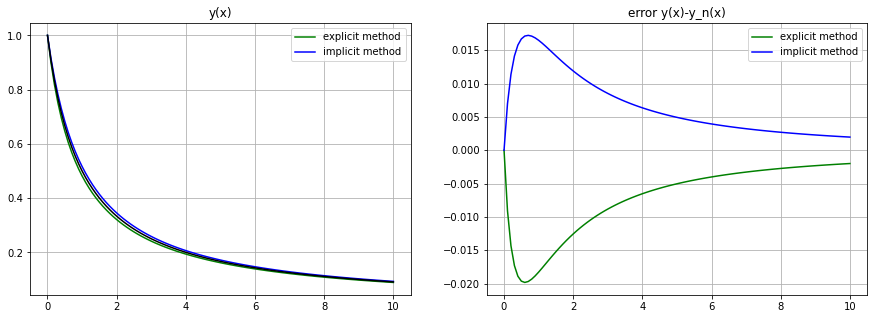

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x, y_ex, color='green', label = 'explicit method')
axs[0].plot(x, y_im, color='blue',  label = 'implicit method')
axs[0].plot(x, y_sol, color='black')
axs[1].plot(x, y_ex-y_sol, label = 'explicit method', color='green')
axs[1].plot(x, y_im-y_sol, label = 'implicit method', color='blue')

axs[0].set_title("y(x)") ;
axs[1].set_title("error y(x)-y_n(x)") ;
axs[0].legend()
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)

## Task 2

Solve the problem:

$
\vec{y}' = 
\begin{bmatrix}
-501 & 500 \\
500 & -501 
\end{bmatrix}
\vec{y}
$

using explicit Euler (and implicit) method with $\vec{y}(0)=[1,0]^T$ for $t\in[0,10]$.

In [5]:
from numpy import linalg as la

A = np.array([[-501, 500], [500, -501]])

eigenvals, eigenvecs = la.eig(A)
print("matrix \n{:}\n\neigenvalues: {:}\n\neigenvectors = {:}".format(A,eigenvals, eigenvecs ))

matrix 
[[-501  500]
 [ 500 -501]]

eigenvalues: [-1.000e+00 -1.001e+03]

eigenvectors = [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [6]:
tt=np.linspace(0,1,10001)
h=tt[1]-tt[0]

## analitical solution:

C1 = 1/(0.70710678*2)
C2 = -1/(0.70710678*2)

lambda1 = eigenvals[0]
lambda2 = eigenvals[1]

v1 = eigenvecs.T[0]
v2 = eigenvecs.T[1]

sol = C1 * v1.reshape(-1,1) * np.exp(lambda1*tt) + C2 * v2.reshape(-1,1) * np.exp(lambda2*tt)

In [7]:
print("eigenvector v1 = {:}\t\t eigenvalue lambda1 = {:2f}".format(v1, lambda1))
print("eigenvector v2 = {:}\t\t eigenvalue lambda2 = {:2f}".format(v2, lambda2))

eigenvector v1 = [0.70710678 0.70710678]		 eigenvalue lambda1 = -1.000000
eigenvector v2 = [-0.70710678  0.70710678]		 eigenvalue lambda2 = -1001.000000


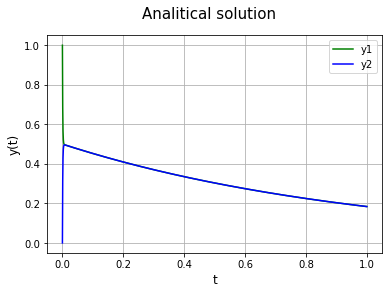

In [8]:
fig, ax = plt.subplots()

ax.plot(tt,sol[0], color='green', label = 'y1')
ax.plot(tt,sol[1], color = 'blue', label = 'y2')
ax.set_xlabel("t", fontsize = 12)
ax.set_ylabel("y(t)", fontsize = 12)
ax.grid(True)
ax.legend()
fig.suptitle('Analitical solution', fontsize = 15)
plt.show()

#### Stability conditions for explicit euler method: $ \forall \lambda -1 < (1-h\cdot \lambda) <1$

condition 1 
$$-1<(1-h)<1$$

condition 2
$$-1<(1-1001\cdot h)<1$$

so:
$$0<h<\frac{1}{500.5}$$

In [9]:
y = np.empty( (tt.size, 2))

y[0][0] = 1
y[0][1] = 0

for n, t in enumerate(tt[:-1]):
    y[n+1] = y[n] + h*A.dot(y[n])

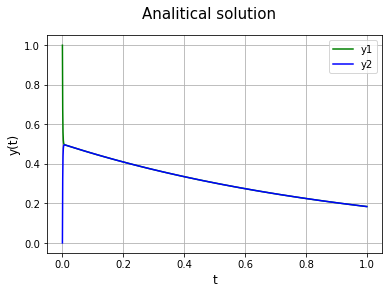

In [10]:
fig, ax = plt.subplots()

ax.plot(tt,y.T[0], color='green', label = 'y1')
ax.plot(tt,y.T[1], color = 'blue', label = 'y2')
ax.set_xlabel("t", fontsize = 12)
ax.set_ylabel("y(t)", fontsize = 12)
ax.grid(True)
ax.legend()
fig.suptitle('Analitical solution', fontsize = 15)
plt.show()

## Task 3
Implement RK4 method. 

Runge Kutta method (RK4):

$$k_1 = h\cdot F\left(t_n, y_n\right)$$
$$k_2 = h\cdot F\left(t_n+\frac{h}{2}, y_n+\frac{k_1}{2}\right) $$
$$k_3 = h\cdot F\left(t_n+\frac{h}{2}, y_n+\frac{k_2}{2}\right)$$
$$k_4 = h\cdot F\left(t_n+h, y_n+k3\right)$$

$$y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k4)$$
$$t_{n+1}=t_n +h$$

### Sample problem:

$$ \frac{dy}{dx} = \frac{5 x^2-y} {e^{x+y}} $$

$$y(0)=1$$

In [11]:
def F(x,y):
    return (5*x*x -y)/(np.exp(x+y))

In [12]:
xx=np.linspace(0,1,101)
h=xx[1]-xx[0]


#### numerical RK method
y0 = 1
y = np.empty(xx.size)
dy = np.empty(xx.size-1)

y[0] = y0

for n, x in enumerate(xx[:-1]):
    
    k1 = h*F(x,y[n]) 
    k2 = h*F( x+0.5*h, y[n]+k1*0.5 )
    k3 = h*F( x+0.5*h, y[n]+k2*0.5 )
    k4 = h*F( x+h, y[n]+k3)        
    y[n+1] = y[n] + (k1 + 2*k2 + 2*k3 + k4)/6
    dy[n] = y[n+1]-y[n]

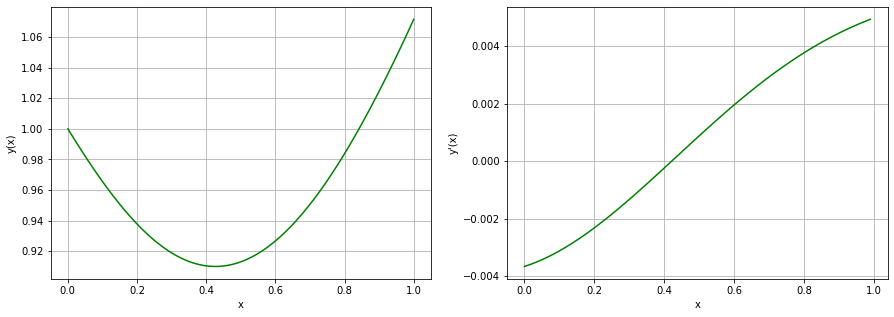

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(xx, y, color='green', label = 'RK4')
axs[1].plot(xx[:-1], dy, color='green')

axs[0].set_ylabel("y(x)") ;
axs[0].set_xlabel("x") ;

axs[1].set_ylabel("y'(x)") ;
axs[1].set_xlabel("x") ;

axs[0].grid(True)
axs[1].grid(True)

## Task 4:

Solve a diffusion equation
$$ u_t=u_{xx}$$

using a three-point or five-point stencil to discretize the spatial derivatives (and transform a PDE into a system of ODEs in time). Use your favourite method to solve the time dependent problem:

$$ u(x,0) = \sin{\pi x L}$$

for boundary conditions:

$$ \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} $$

$$ u(0,t) = 0$$
$$ u(L,t) = 0$$

The centered difference formulas for five-point stencils approximating second derivative:

$$ f''(x)\approx \frac {-f(x+2h)+16f(x+h)-30f(x)+16f(x-h)-f(x-2h)}{12h^{2}} $$
 
 $$\frac{\partial u(x,t)}{\partial t} = \frac{\partial^2 u}{\partial x^2}  = \frac {-f(x+2h)+16f(x+h)-30f(x)+16f(x-h)-f(x-2h)}{12h^{2}}$$
 
 

$$ \frac{u^{n+1}_i - u^n_i}{t^{n+1}-t^n} = \frac {-u^n_{i+2} + 16\cdot u^n_{i+1} -30\cdot u^n_i +16\cdot u^n_{i-1} -u_{n-2}}{12 (x_{i+1}-x_i) ^{2}}$$

Using a substitution:
* $\Delta x= x_{i+1}-x_i$, $i \in (0, N_x)$
* $\Delta t = t^{n+1}-t^n $, $n \in (0, N_t)$

We get:

$$ u^{n+1}_i  = u^n_i  + \frac{\Delta t}{12 \Delta x^2} \left[-u^n_{i+2} + 16\cdot u^n_{i+1} -30\cdot u^n_i +16\cdot u^n_{i-1} -u_{n-2} \right] $$

From the boundary conditions we have: 
* $\forall n: u_0^n = 0$
* $\forall n: u_{Nx}^n = 0$
* $\forall i: u_i^0 = \sin{\left( \frac{\pi x_i}{L}\right)}$

From the symmetry properties of $\sin{\left( \frac{\pi x_i}{L}\right)}$:
* $\forall n: u_{-1}^n = -u_{1}^n$
* $\forall n: u_{L+1}^n = -u_{L}^n$

In [14]:
Nx= 100
Nt = 100000
T = 10
L = 5

xx = np.linspace(0, L, Nx+1)
tt = np.linspace(0, T, Nt+1)

dx = xx[1] - xx[0]
dt = tt[1] - tt[0]

In [15]:
## five-point stencil 
y = np.empty((Nt+1,Nx+1))

# set initial conditions at t-0
y[0,:] = np.sin(PI*xx/L) 

## set boundary conditions:
y[:,0] = 0   
y[:,Nx] = 0  
    

F = dt/(12*dx**2)

for n in range(1,Nt+1):
    for i in range(2,Nx-1): 
        y[n][i] = y[n-1][i] + F*(-y[n-1][i+2] + 16*y[n-1][i+1] - 30*y[n-1][i] + 16*y[n-1][i-1]-y[n-1][i-2])
    
    y[n][1] = y[n-1][1] + F*(-y[n-1][3] + 16*y[n-1][2] - 30*y[n-1][1] + 16*y[n-1][0]+y[n-1][1])
    y[n][Nx-1] = y[n-1][Nx-1] + F*(y[n-1][Nx-1] + 16*y[n-1][Nx] - 30*y[n-1][Nx-1] + 16*y[n-1][Nx-2] -y[n-1][Nx-3])

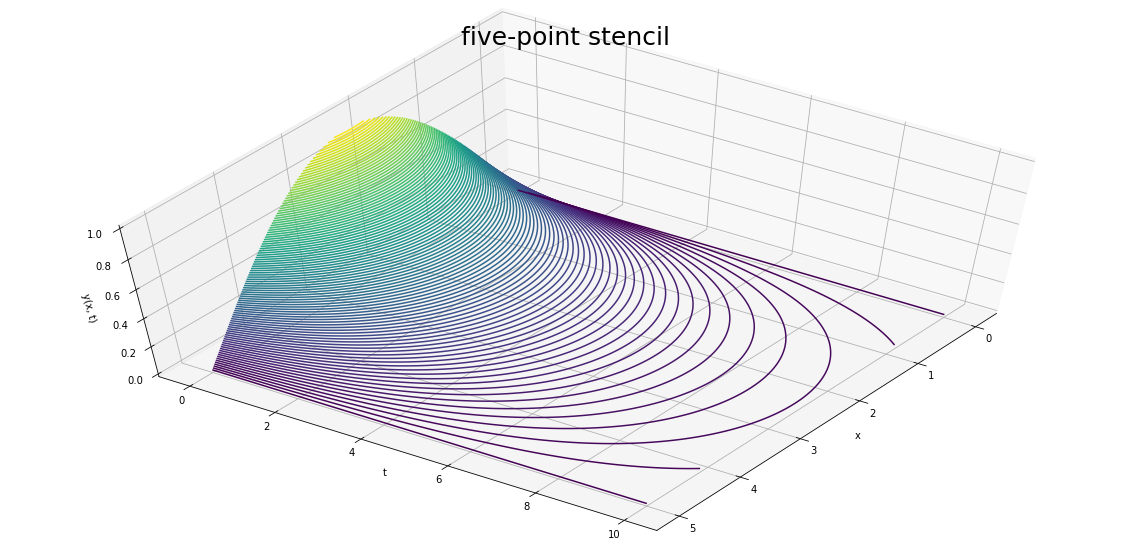

In [16]:
X, T = np.meshgrid(xx, tt)

fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, T, y, 100, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('y(x, t)');
ax.set_title('five-point stencil', fontsize = 25)
ax.view_init(60, 35);

In [17]:
## three-point stencil 
y = np.empty((Nt+1,Nx+1))

# set initial conditions at t-0
y[0,:] = np.sin(PI*xx/L) 

## set boundary conditions:
y[:,0] = 0   
y[:,Nx] = 0
    
F = dt/(dx**2)

for i in range(1,Nt+1):
    for j in range(1,Nx): 
        y[i][j] = y[i-1][j] + F*(y[i-1][j-1] - 2*y[i-1][j] + y[i-1][j+1])

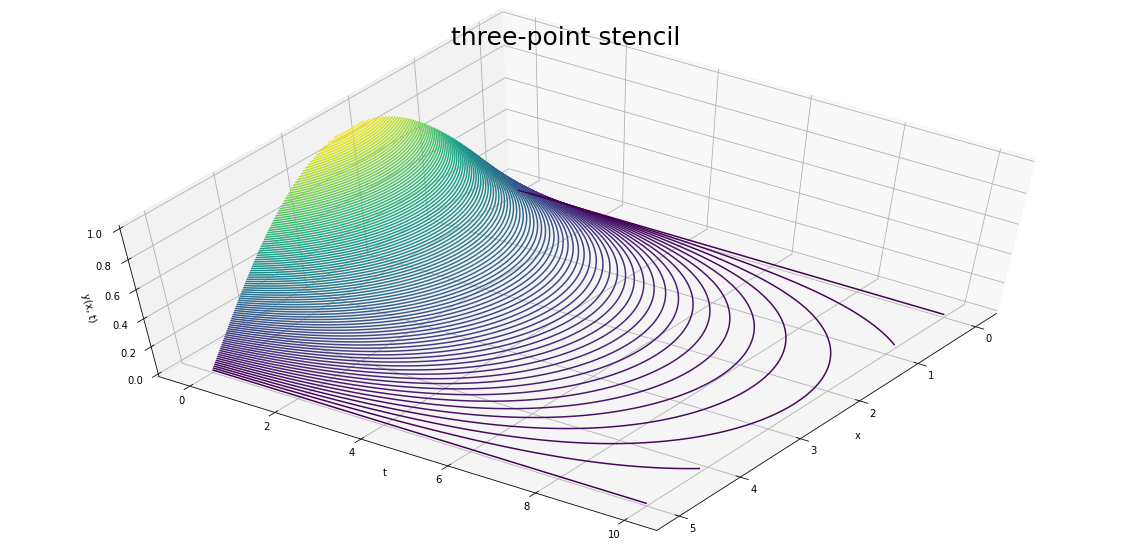

In [18]:
X, T = np.meshgrid(xx, tt)

fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, T, y, 100, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('y(x, t)');
ax.set_title('three-point stencil', fontsize = 25)
ax.view_init(60, 35)

## Task 5:

Solve: 
$$y''=2y(y^2−1)$$
$$y(0)=0$$

$$y(\infty)\approx y(L)=1$$

### Shooting method:

$$\vec{y(x)} = \begin{bmatrix} y(x)\\y'(x)\end{bmatrix}
$$

$$\vec{y'(x)} =\begin{bmatrix} y'(x)\\y''(x)\end{bmatrix}
$$

We start with some initial values: $\vec{y(0)} = \begin{bmatrix} y(0)\\y'(0)\end{bmatrix} = \begin{bmatrix} 0\\a\end{bmatrix}$ and look for a value of $a$ such that $y(\infty)\approx y(L)=1$

In [19]:
def Equation(y, x):      # y->[y(x), y'(x)]
    df0 = y[1]
    df1 = 2*y[0]*(y[0]**2-1)
    return [df0, df1]    # y->[y'(x), y''(x)]

In [20]:
def target_f(a, L, y_L):
    y0 = [0, a] 
    x  = np.linspace(0, L, 10001)
    sol = odeint(Equation, y0, x)
    return sol[-1,0]- y_L

In [21]:
L = 10
y_L = 1      # y(L)
xtol = 1e-14

a = fsolve(target_f, [1], args=(L,y_L), xtol=xtol)[0]

/home/neofelia/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


a = 0.9999999596881586	 y(L) = 1.225047107027934


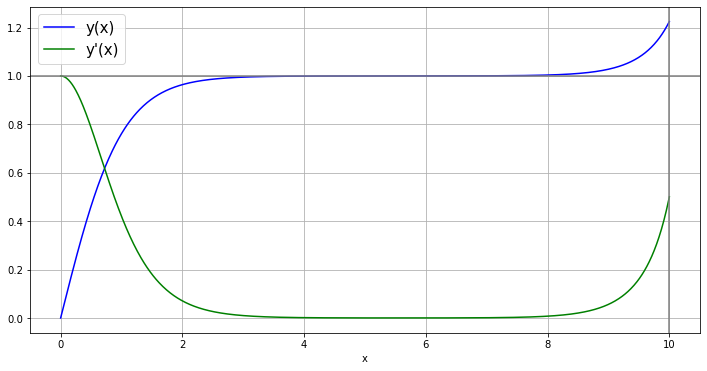

In [22]:
y0 = [0, a] 
x  = np.linspace(0, L, 1001)
sol = odeint(Equation, y0, x)
print("a = {:}\t y(L) = {:}".format(a,sol[-1,0]))

fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(x, sol.T[0], color = 'blue', label = 'y(x)')
ax.plot(x, sol.T[1], color = 'green', label = 'y\'(x)')
ax.set_xlabel('x')
ax.axhline(y=1, color = 'gray')
ax.axvline(x=L, color = 'gray')
ax.grid(True)
ax.legend(fontsize=15)

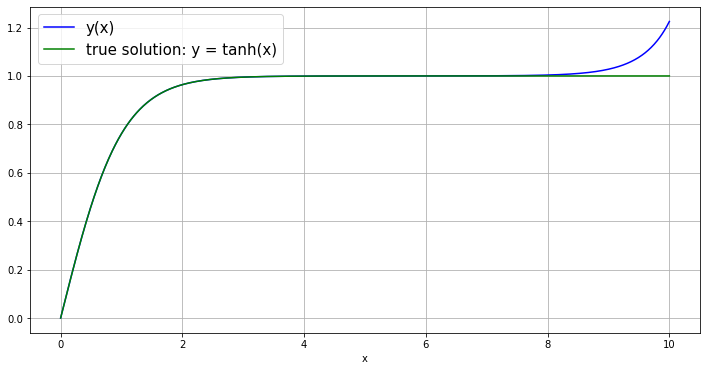

In [23]:
y_truesol = np.tanh(x)

fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(x, sol.T[0], color = 'blue', label = 'y(x)')
ax.plot(x, y_truesol, color = 'green', label = 'true solution: y = tanh(x)')
ax.set_xlabel('x')

ax.grid(True)
ax.legend(fontsize=15)

## Task 6:

Eigenvalue problem (find $\omega$)

$$ −y''+ \left(4− \frac{6}{cosh^2x}\right) y=\omega^2 y$$

with:
$$ y(0)=1$$
$$ y'(0)=0$$

$$y(\infty)\approx y(L)=0$$


or
$$ y(0)=0 $$
$$ y'(0)=1$$
$$y(\infty)\approx y(L)=1$$

In [24]:
def Equation(y, x, *args):   
    omega = args[0]
    df0 = y[1]
    df1 = (4-6/(np.cosh(x)**2))*y[0] - omega**2*y[0]
    return [df0, df1]

In [25]:
def target_f(omega, L, y0, y_L):
    x  = np.linspace(0, L, 1001)
    sol = odeint(Equation, y0, x, args=(omega,))
    return sol[-1,0]- y_L

In [26]:
L = 20
y_L = 0  
y0 = [1, 0] 
xtol = 1e-14

omega = fsolve(target_f, [1], args=(L,y0,y_L), xtol=xtol)[0] ;

omega = 2.0018010025501036	 y(L) = 7.904898957633577e-12


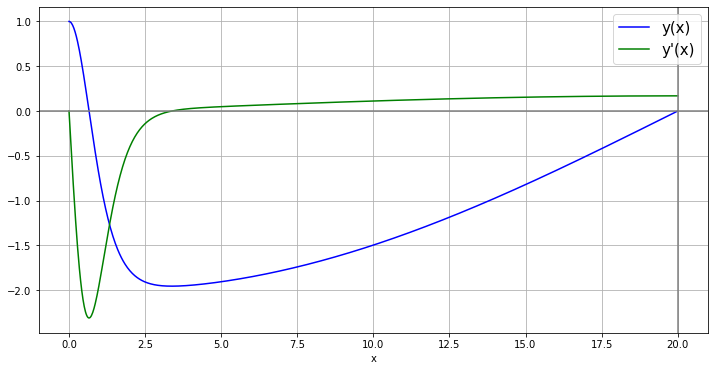

In [27]:
x  = np.linspace(0, L, 1001)
sol = odeint(Equation, y0, x, args=(omega,))

print("omega = {:}\t y(L) = {:}".format(omega,sol[-1,0]))

fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(x, sol.T[0], color = 'blue', label = 'y(x)')
ax.plot(x, sol.T[1], color = 'green', label = 'y\'(x)')
ax.set_xlabel('x')
ax.axhline(y=0, color = 'gray')
ax.axvline(x=L, color = 'gray')
ax.grid(True)
ax.legend(fontsize=15, loc = 'upper right') ;

In [28]:
L = 10
y_L = 0
y0 = [0, 1] 
xtol = 1e-14

omega = fsolve(target_f, [1], args=(L,y0,y_L), xtol=xtol)#[0]

/home/neofelia/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


omega = [1.73205082]	 y(L) = -1.520637836569666e-12


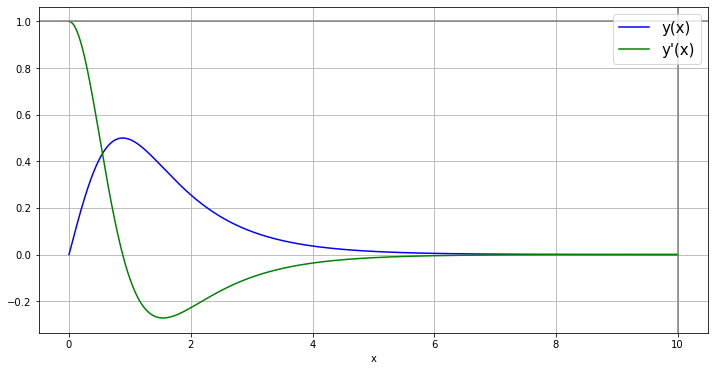

In [29]:
x  = np.linspace(0, L, 1001)
sol = odeint(Equation, y0, x, args=(omega,))

print("omega = {:}\t y(L) = {:}".format(omega,sol[-1,0]))

fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(x, sol.T[0], color = 'blue', label = 'y(x)')
ax.plot(x, sol.T[1], color = 'green', label = 'y\'(x)')
ax.set_xlabel('x')
ax.axhline(y=1, color = 'gray')
ax.axvline(x=L, color = 'gray')
ax.grid(True)
ax.legend(fontsize=15, loc = 'upper right') ;